# K-Means for Hearing Threshold Data Clustering - In Long Data Format

`Each participant's both ears are treated as if they were two participants.`

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load the data
file_path = "../data/nhanes_1520_age.csv"
data = pd.read_csv(file_path)
data.set_index('SEQN', inplace=True)
print(data.shape)
data.head()

(9729, 15)


,AUXU500R,AUXU1K1R,AUXU2KR,AUXU3KR,AUXU4KR,AUXU6KR,AUXU8KR,AUXU500L,AUXU1K1L,AUXU2KL,AUXU3KL,AUXU4KL,AUXU6KL,AUXU8KL,RIDAGEYR
SEQN,,,,,,,,,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0,5.0,5.0,5.0,35.0,50.0,50.0,55.0,62
83733,10.0,15.0,40.0,55.0,60.0,55.0,65.0,5.0,20.0,50.0,55.0,60.0,55.0,60.0,53
83735,25.0,25.0,30.0,20.0,40.0,40.0,55.0,15.0,25.0,30.0,30.0,45.0,60.0,50.0,56
83736,10.0,10.0,10.0,15.0,10.0,15.0,20.0,15.0,10.0,15.0,25.0,15.0,25.0,20.0,42
83741,5.0,0.0,5.0,5.0,5.0,20.0,15.0,0.0,-5.0,0.0,5.0,-5.0,10.0,10.0,22


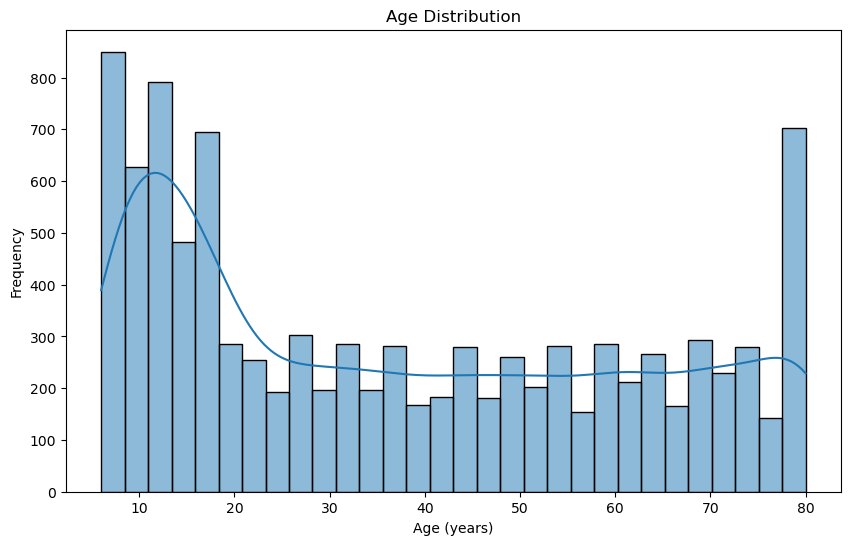

In [4]:
# Check the age distribution in the column 'RIDAGEYR'
plt.figure(figsize=(10, 6))
sns.histplot(data['RIDAGEYR'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Select the columns for right ear measurements

right_ear_columns = ['AUXU500R', 'AUXU1K1R', 'AUXU2KR', 'AUXU3KR', 'AUXU4KR', 'AUXU6KR', 'AUXU8KR']
right_ear_data = data[right_ear_columns]
right_ear_data.columns = ['500 Hz', '1 kHz', '2 kHz', '3 kHz', '4 kHz', '6 kHz', '8 kHz']

# Select the columns for left ear measurements

left_ear_columns = ['AUXU500L', 'AUXU1K1L', 'AUXU2KL', 'AUXU3KL', 'AUXU4KL', 'AUXU6KL', 'AUXU8KL']
left_ear_data = data[left_ear_columns]
left_ear_data.columns = ['500 Hz', '1 kHz', '2 kHz', '3 kHz', '4 kHz', '6 kHz', '8 kHz']

# Concatenate the right and left ear data

ear_data = pd.concat([right_ear_data, left_ear_data], axis=0)

# Change the column names to be more descriptive

ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
SEQN,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0
83733,10.0,15.0,40.0,55.0,60.0,55.0,65.0
83735,25.0,25.0,30.0,20.0,40.0,40.0,55.0
83736,10.0,10.0,10.0,15.0,10.0,15.0,20.0
83741,5.0,0.0,5.0,5.0,5.0,20.0,15.0
...,...,...,...,...,...,...,...
124797,888.0,0.0,-5.0,888.0,5.0,888.0,10.0
124799,20.0,40.0,45.0,45.0,60.0,85.0,666.0
124811,35.0,30.0,15.0,30.0,25.0,55.0,60.0


In [6]:
# Process missing values
cleaned_ear_data = ear_data.replace({888: np.nan, 666: np.nan, '.': np.nan}, inplace=False)
cleaned_ear_data = cleaned_ear_data.dropna(inplace=False)
# cleaned_ear_data.reset_index(drop=True, inplace=True)

cleaned_ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
SEQN,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0
83733,10.0,15.0,40.0,55.0,60.0,55.0,65.0
83735,25.0,25.0,30.0,20.0,40.0,40.0,55.0
83736,10.0,10.0,10.0,15.0,10.0,15.0,20.0
83741,5.0,0.0,5.0,5.0,5.0,20.0,15.0
...,...,...,...,...,...,...,...
124784,45.0,50.0,50.0,50.0,50.0,45.0,80.0
124786,0.0,10.0,10.0,5.0,0.0,15.0,0.0
124787,20.0,10.0,5.0,5.0,5.0,10.0,5.0


In [7]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_ear_data)

scaled_data

array([[-0.08278503, -0.46716583, -0.48842561, ...,  0.59217122,
         0.10337954,  1.0352841 ],
       [-0.08278503,  0.3742576 ,  1.8583647 , ...,  2.06048192,
         1.48764244,  1.63519778],
       [ 1.30621995,  1.21568102,  1.18785319, ...,  1.08160812,
         0.79551099,  1.23525533],
       ...,
       [ 0.84321829, -0.04645412, -0.48842561, ..., -0.63142103,
        -0.58875191, -0.76445693],
       [ 2.23222327,  1.63639274,  0.18208591, ...,  0.34745277,
         1.48764244,  1.43522655],
       [-0.54578669,  0.3742576 ,  0.18208591, ...,  1.57104502,
         1.71835293,  2.03514023]])

# K-Means with n clusters

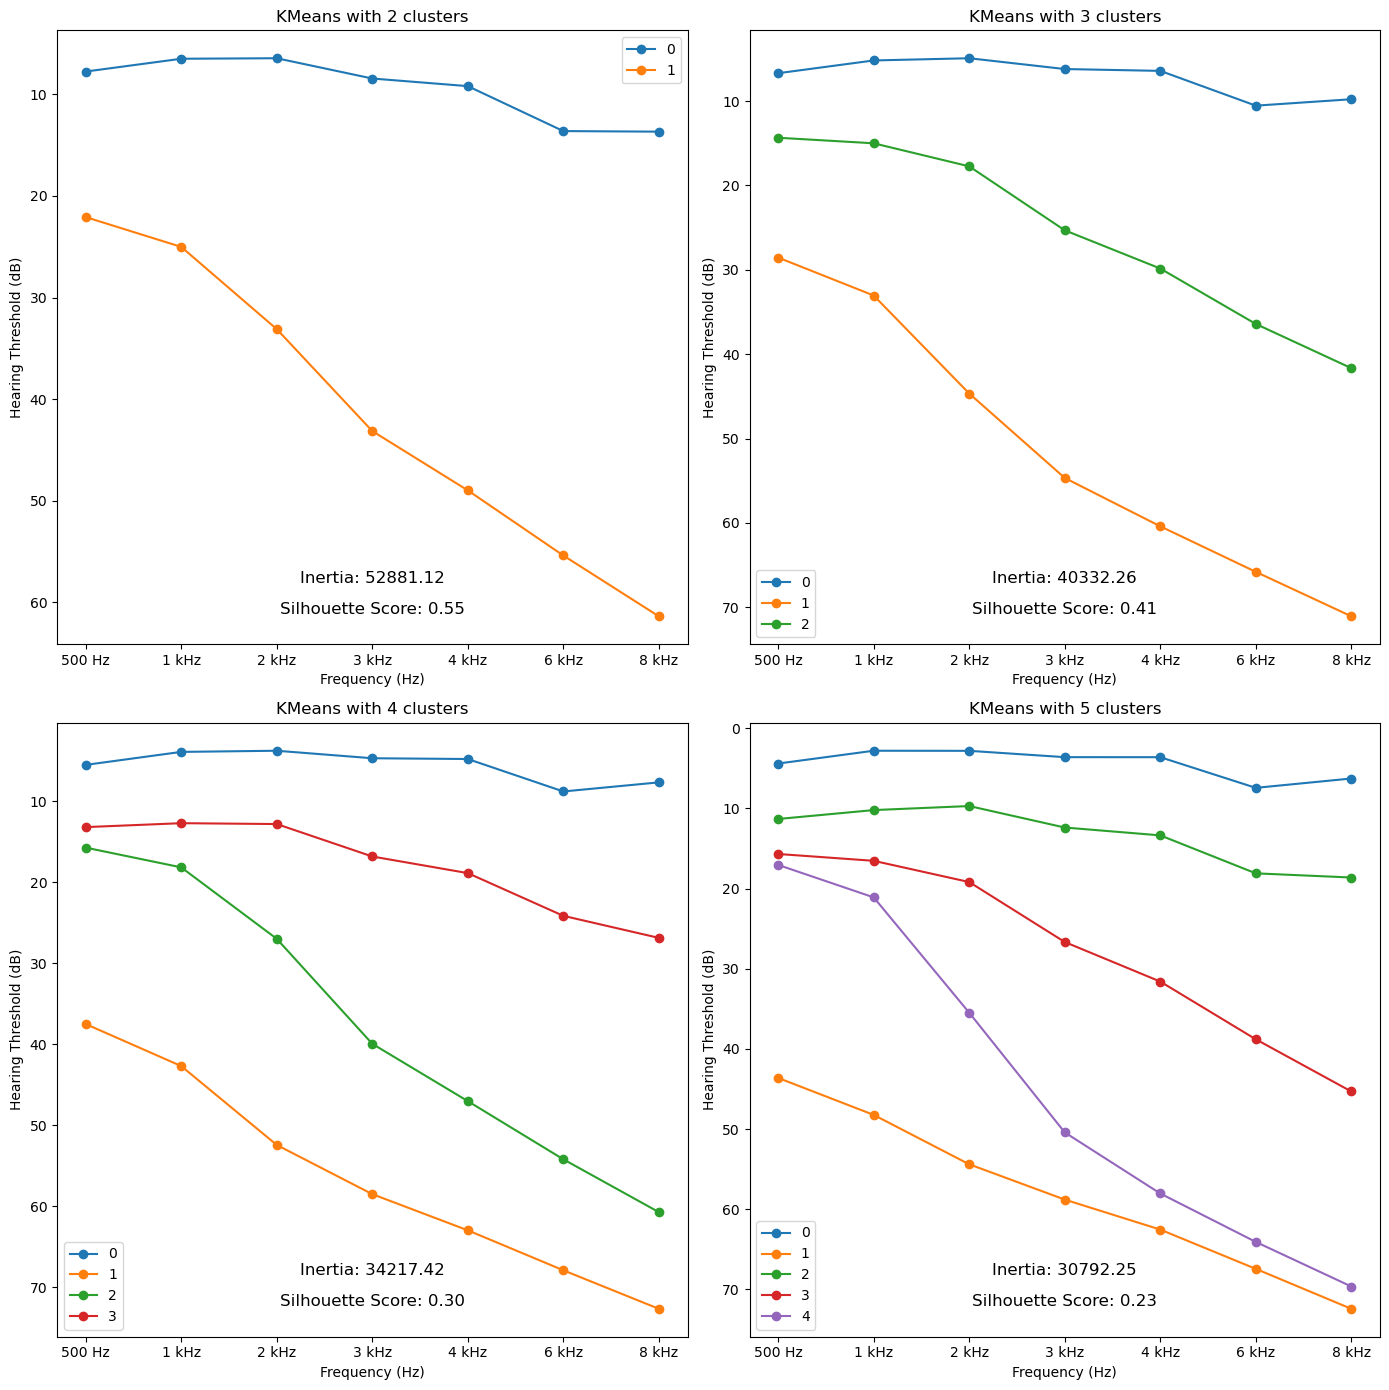

In [110]:
# Fit the K-Means algorithm with n clusters = 2, 3, 4, 5

fig, ax = plt.subplots(2, 2, figsize=(14, 14))

for i in range(2, 6):
    # Initialize the KMeans object
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(scaled_data)

    # Extract the centroids
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    centroids_df = pd.DataFrame(centroids, columns=cleaned_ear_data.columns)

    # Plot the line plot
    row = (i - 2) // 2
    col = (i - 2) % 2
    ax[row, col].plot(centroids_df.T, marker='o')
    ax[row, col].set_title(f'KMeans with {i} clusters')
    ax[row, col].set_xlabel('Frequency (Hz)')
    ax[row, col].set_ylabel('Hearing Threshold (dB)')
    ax[row, col].invert_yaxis()
    ax[row, col].legend(range(i))

    # Annotate the Silhouette Score
    ax[row, col].annotate(f'Silhouette Score: {silhouette_score(scaled_data, kmeans.labels_):.2f}', 
                          xy=(0.5, 0.05), xycoords='axes fraction', ha='center', fontsize=12)
    
    # Annotate the Inertia
    ax[row, col].annotate(f'Inertia: {kmeans.inertia_:.2f}', 
                          xy=(0.5, 0.10), xycoords='axes fraction', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Examine the Age Distribution

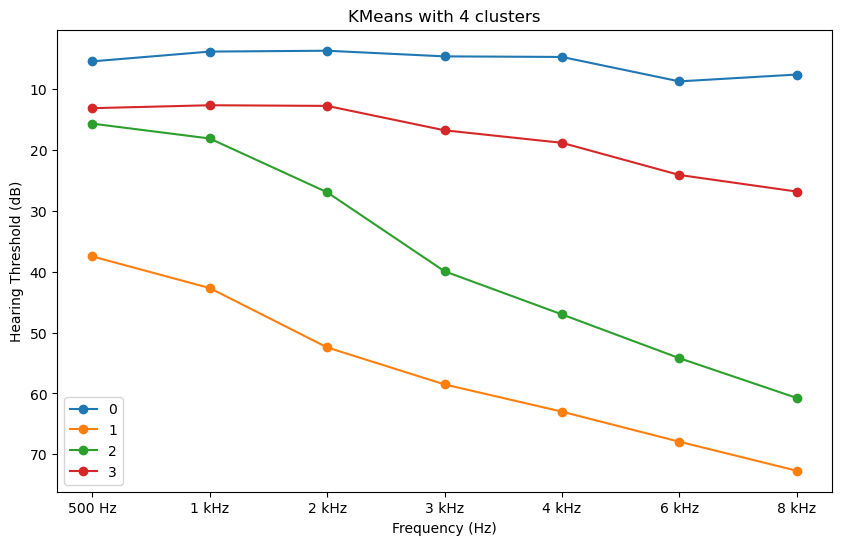

In [9]:
# Extract labels for 4 clusters

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(scaled_data)
labels = kmeans.labels_

# Plot 4 clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=ear_data.columns)
plt.figure(figsize=(10, 6))
plt.plot(centroids_df.T, marker='o')
plt.title('KMeans with 4 clusters')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Hearing Threshold (dB)')
plt.gca().invert_yaxis()
plt.legend(range(4))
plt.show()

# Add the labels to the cleaned ear data

cleaned_ear_data['Cluster_Raw'] = labels

# Left join the age data from the data DataFrame

age_data = data[['RIDAGEYR']]
merged_data = cleaned_ear_data.merge(age_data, on='SEQN', how='left')

# Generate a table of age distribution by 4 clusters
summarized_table = merged_data.groupby('Cluster_Raw')['RIDAGEYR'].describe()

In [10]:
summarized_table.rename(index={0: 'Blue', 1: 'Orange', 2: 'Green', 3: 'Red'}).sort_values(by='mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
Cluster_Raw,,,,,,,,
Blue,8646.0,22.505089,13.735918,6.0,12.0,18.0,31.0,78.0
Red,4638.0,44.583226,19.994799,6.0,30.0,48.0,60.0,80.0
Green,2285.0,64.549672,13.550154,6.0,59.0,67.0,74.0,80.0
Orange,941.0,68.054198,15.912468,6.0,63.0,74.0,80.0,80.0


# K-Means for Percentile

In [19]:
# Replace original values with percentiles
ranked_ear_data = cleaned_ear_data.rank(method='average', pct=True).drop(columns='Cluster_Raw')
ranked_ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
SEQN,,,,,,,
83732,0.435433,0.214355,0.242217,0.677347,0.761599,0.626772,0.808722
83733,0.435433,0.685706,0.924409,0.934949,0.930951,0.874924,0.881224
83735,0.891884,0.880557,0.869231,0.677347,0.831133,0.789764,0.832041
83736,0.435433,0.496790,0.474319,0.564022,0.385584,0.401817,0.534585
83741,0.168988,0.045912,0.242217,0.197759,0.206784,0.529558,0.420291
...,...,...,...,...,...,...,...
124784,0.979952,0.981284,0.957783,0.915566,0.885584,0.822229,0.955784
124786,0.029921,0.496790,0.474319,0.197759,0.067898,0.401817,0.071654
124787,0.814779,0.496790,0.242217,0.197759,0.206784,0.251363,0.165839


In [20]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ranked_ear_data)

scaled_data

array([[ 0.07672179, -0.6521531 , -0.60712044, ...,  1.01737225,
         0.56248093,  1.14855735],
       [ 0.07672179,  0.87690736,  1.60128605, ...,  1.5684727 ,
         1.38172356,  1.38856794],
       [ 1.57440122,  1.50900547,  1.42266061, ...,  1.24364669,
         1.10057757,  1.22575374],
       ...,
       [ 1.32140946,  0.26406496, -0.60712044, ..., -0.78809273,
        -0.676881  , -0.97965691],
       [ 1.7884406 ,  1.63377461,  0.72443319, ...,  0.86501151,
         1.38172356,  1.30495523],
       [-0.79752076,  0.87690736,  0.72443319, ...,  1.42084243,
         1.46190816,  1.56481633]])

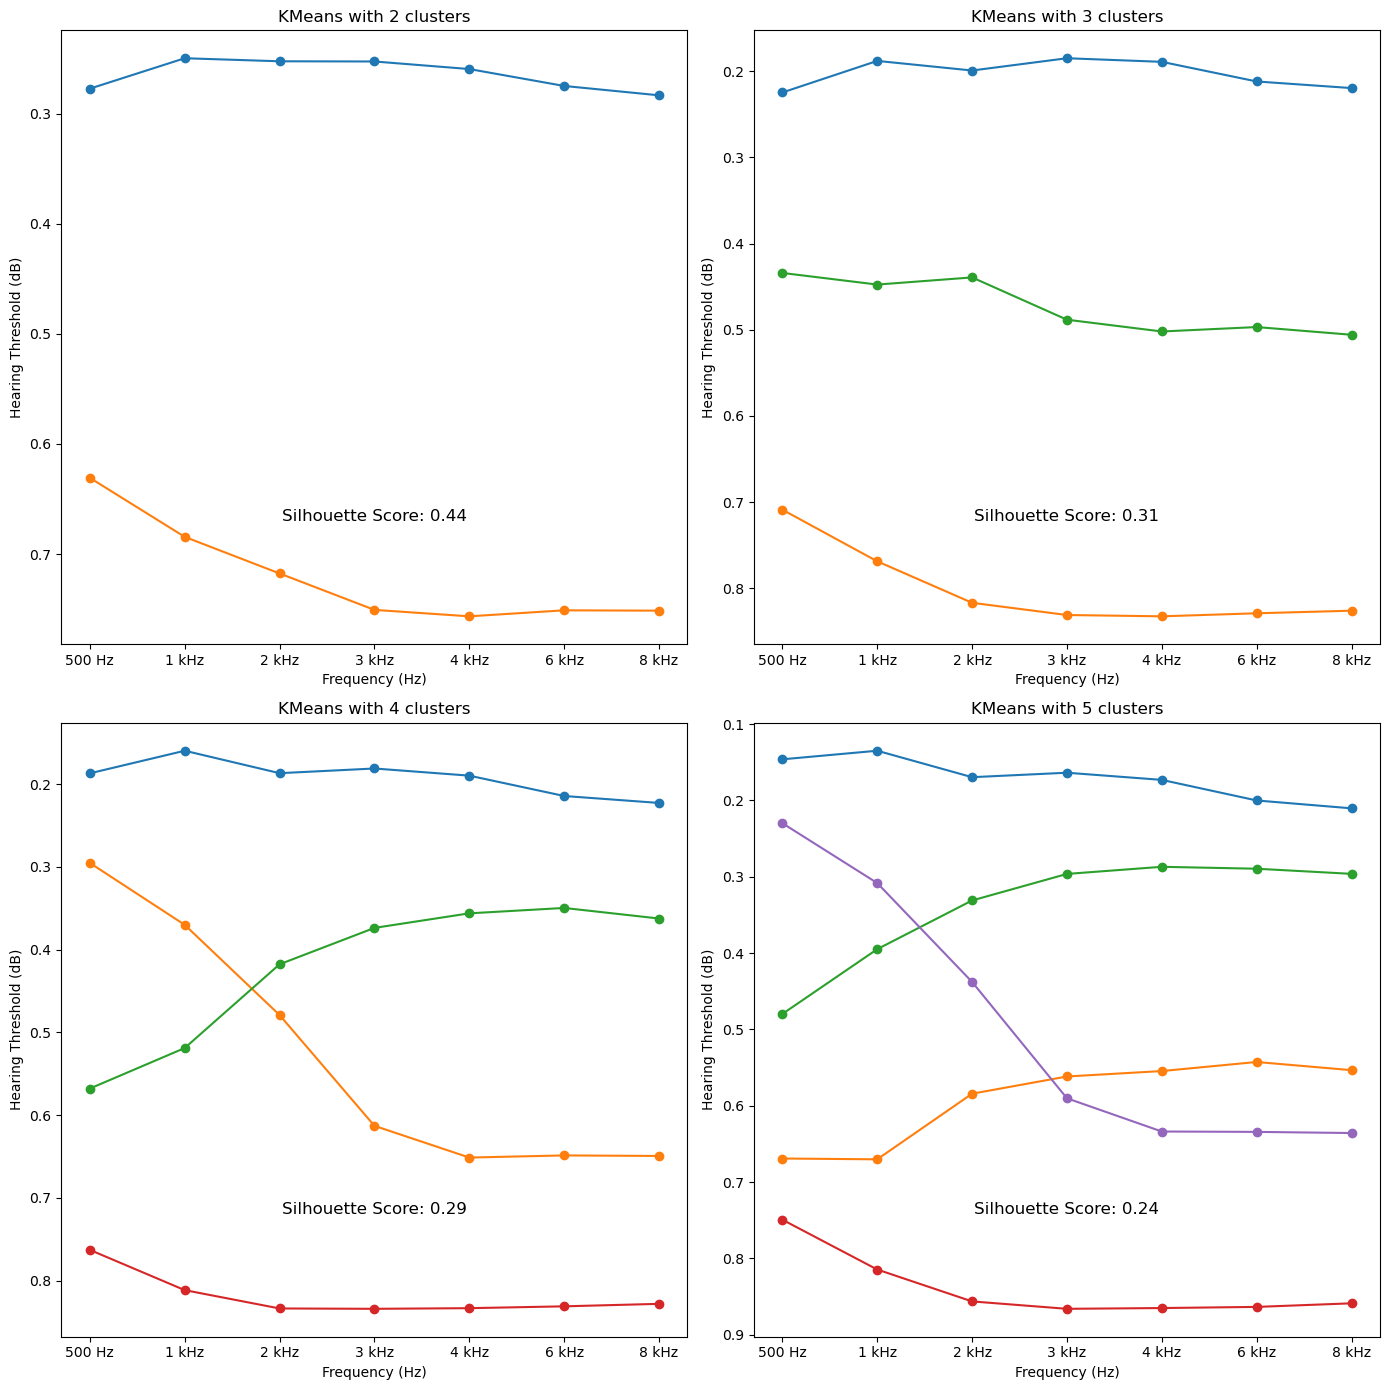

In [21]:
# Fit the K-Means algorithm with n clusters = 2, 3, 4, 5

fig, ax = plt.subplots(2, 2, figsize=(14, 14))

for i in range(2, 6):
    # Initialize the KMeans object
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(ranked_ear_data)

    # Extract the centroids
    # centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    centroids = kmeans.cluster_centers_
    centroids_df = pd.DataFrame(centroids, columns=ear_data.columns)

    # Plot the line plot
    row = (i - 2) // 2
    col = (i - 2) % 2
    ax[row, col].plot(centroids_df.T, marker='o')
    ax[row, col].set_title(f'KMeans with {i} clusters')
    ax[row, col].set_xlabel('Frequency (Hz)')
    ax[row, col].set_ylabel('Hearing Threshold (dB)')
    ax[row, col].invert_yaxis()

    # Annotate the Silhouette Score
    ax[row, col].annotate(f'Silhouette Score: {silhouette_score(scaled_data, kmeans.labels_):.2f}', 
                          xy=(0.5, 0.20), xycoords='axes fraction', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

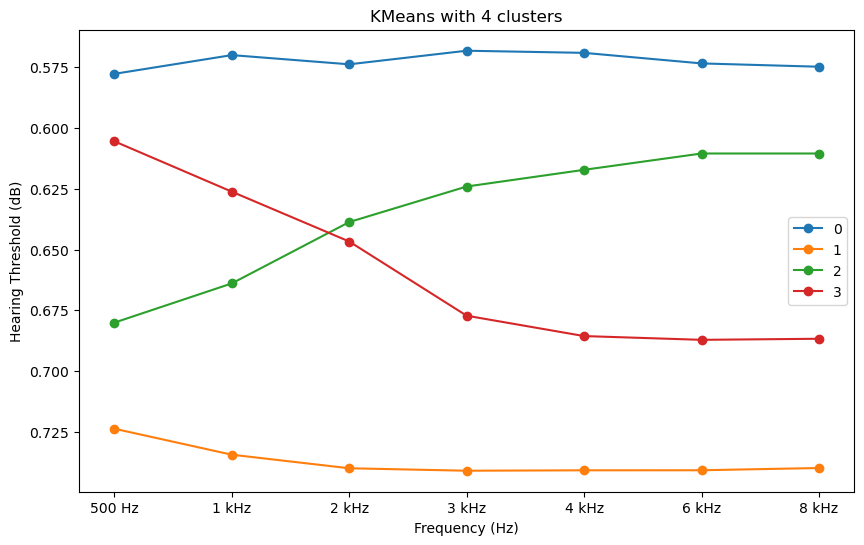

In [116]:
# Extract labels for 4 clusters

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(ranked_ear_data)
labels = kmeans.labels_

# Plot 4 clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=ear_data.columns)
plt.figure(figsize=(10, 6))
plt.plot(centroids_df.T, marker='o')
plt.title('KMeans with 4 clusters')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Hearing Threshold (dB)')
plt.gca().invert_yaxis()
plt.legend(range(4))
plt.show()

# Add the labels to the cleaned ear data

cleaned_ear_data['Cluster_Pct'] = labels

# Left join the age data from the data DataFrame

age_data = data[['RIDAGEYR']]
merged_data = cleaned_ear_data.merge(age_data, on='SEQN', how='left')

# Generate a table of age distribution by 4 clusters
summarized_table = merged_data.groupby('Cluster_Pct')['RIDAGEYR'].describe()

In [117]:
summarized_table.rename(index={0: 'Blue', 1: 'Orange', 2: 'Green', 3: 'Red'}).sort_values(by='mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
Cluster_Pct,,,,,,,,
Blue,5755.0,20.224153,11.626851,6.0,12.0,17.0,26.0,74.0
Green,3682.0,27.102662,17.053085,6.0,12.0,23.0,40.0,80.0
Red,3002.0,47.303131,17.923308,6.0,36.0,49.0,61.0,80.0
Orange,4071.0,62.565709,16.403498,6.0,55.0,66.0,75.0,80.0


In [118]:
crosstab = pd.crosstab(cleaned_ear_data['Cluster_Raw'], cleaned_ear_data['Cluster_Pct'])
crosstab

Cluster_Pct,0,1,2,3
Cluster_Raw,,,,
0,5755,0,2152,739
1,0,941,0,0
2,0,2002,0,283
3,0,1128,1530,1980
